In [98]:
import os
import time
from random import random
import tweepy as tp
import jsonpickle

import json
import sys
import string
import re
import us
import simplejson
from twython import Twython
from textblob import TextBlob
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time, timedelta
from dateutil import parser as dateparser
from collections import Counter

In [99]:
consumer_key = 'D44YmpJEtFioaZkYmXWJ8hwc8'
consumer_secret = 'LekWYdSHt2XJ5yr7HOEK7i560kqhWDVXzuxesdJr9rLgwtr5SF'
access_token = '51341945-pgnokFwr0dQrlVXfiAgdxceW3rJiZxr0AO02ildib'
access_secret = 'RLAVqW3sF7nTaBWhAetxC5VagMvxNsbsZiCt1nHuq01it'

# Collecting Data through Twitter API

In [100]:
# login to twitter account api
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tp.API(auth, wait_on_rate_limit=True)

In [101]:
#https://labsblog.f-secure.com/2018/01/26/how-to-get-tweets-from-a-twitter-account-using-python-and-tweepy/
def acquire_tweet_data(accounts, full_API, selected_features):
    if len(accounts) > 0:
        for target in accounts:
            print("Getting data for " + target)
            item = api.get_user(target)
            #aggregated_tweet_data_full contains the entire json from the Twitter API
            full_API[target] = item
            #aggregated_tweet_data_selected contains selected features
            selected_features[target] = {}
            selected_features[target]['name'] = item.name
            selected_features[target]['screen_name'] = item.screen_name
            selected_features[target]['description'] = item.description
            selected_features[target]['statuses_count'] = item.statuses_count
            selected_features[target]['friends_count'] = item.friends_count
            selected_features[target]['followers_count'] = item.followers_count

            print("name: " + item.name)
            print("screen_name: " + item.screen_name)
            print("description: " + item.description)
            print("statuses_count: " + str(item.statuses_count))
            print("friends_count: " + str(item.friends_count))
            print("followers_count: " + str(item.followers_count))

            #Average Tweets per day
            tweets = item.statuses_count
            account_created_date = item.created_at
            delta = datetime.utcnow() - account_created_date
            account_age_days = delta.days
            print("Account age (in days): " + str(account_age_days))
            if account_age_days > 0:
                print("Average tweets per day: " + "%.2f"%(float(tweets)/float(account_age_days)))
                average_tweet_per_day = (float(tweets)/float(account_age_days))
            #add to aggregated_tweet_data_selected
            selected_features[target]['Account_age(in_days)'] = account_age_days
            selected_features[target]['average_tweet_per_day'] = average_tweet_per_day

            #hashtags, mentions, tweet count, and statuses
            hashtags = []
            mentions = []
            tweet_count = 0
            statuses = []
            end_date = datetime.utcnow() - timedelta(days=365)
            for status in tp.Cursor(api.user_timeline, id=target).items():
                statuses.append({"retweeted": status.retweeted, "created_at": status.created_at.hour, "text": status.text, "entities": status.entities})
                tweet_count += 1
                if hasattr(status, "entities"):
                    entities = status.entities
                if "hashtags" in entities:
                    for ent in entities["hashtags"]:
                        if ent is not None:
                            if "text" in ent:
                                hashtag = ent["text"]
                        if hashtag is not None:
                            hashtags.append(hashtag)
                if "user_mentions" in entities:
                    for ent in entities["user_mentions"]:
                        if ent is not None:
                            if "screen_name" in ent:
                                name = ent["screen_name"]
                        if name is not None:
                            mentions.append(name)
                            
            #add to aggregated_tweet_data_selected
            selected_features[target]['hashtags'] = hashtags
            selected_features[target]['mentions'] = mentions
            selected_features[target]['tweet_count'] = tweet_count
            selected_features[target]['statuses'] = statuses

            #printing mentions, hashtags
            print("Most mentioned Twitter users:")
            for item, count in Counter(mentions).most_common(10):
                print(item + "\t" + str(count))

            print("Most used hashtags:")
            for item, count in Counter(hashtags).most_common(10):
                print(item + "\t" + str(count))

            print("All done. Processed " + str(tweet_count) + " tweets.")

# Depressed Users

In [5]:
#batch 1
# account_list = ['ricardojkay', 'eyeamkyri', 'dreiguzman', 'philip_pholland','Nicole_Anderson', 
#                 'CuzValSays', '37YEARWAIT', 'WHATISAPLANET', 'AriannaCorona18', 'Mabbe17']

account_list = []
aggregated_tweet_data_full = {}
aggregated_tweet_data_selected = {}

#call function to acquire tweet data from Twitter API
acquire_tweet_data(account_list, aggregated_tweet_data_full, aggregated_tweet_data_selected)

Getting data for ricardojkay
name: fat bully
screen_name: ricardojkay
description: follow the goofiest hoe in the room 🤪 chunti queen with king @gossipgriII
statuses_count: 41339
friends_count: 143
followers_count: 42737
Account age (in days): 2009
Average tweets per day: 20.58
Most mentioned Twitter users:
gossipgriII	223
ricardojkay	211
charli_xcx	37
ladygaga	35
tropicocunt	33
CupcakKe_rapper	26
lorde	23
ehjovan	22
lindxeyy	19
rihanna	18
Most used hashtags:
NewProfilePic	3
rebelheart	2
TWICE	2
트와이스	2
GirlsGeneration	2
HolidayNight	2
GIRLS6ENERAT10N	2
MysteryOfTheSmize	1
ChunLi	1
IWD18	1
All done. Processed 3134 tweets.
Getting data for eyeamkyri
name: kyri.
screen_name: eyeamkyri
description: someones muse🌸 model. inquires email: moore_kyri@yahoo.com or DM.
statuses_count: 11553
friends_count: 425
followers_count: 1928
Account age (in days): 1287
Average tweets per day: 8.98
Most mentioned Twitter users:
eyeamkyri	115
GabeTowns	97
emojaleah	92
sohollywood___	60
TheyLoveMoodie	55
SimF

Load Existing Depressed User Data

In [102]:
with open('depressed_users.json') as data_file:    
    D_data = json.load(data_file)
    aggregated_tweet_data_selected= D_data

Aggregate Depressed User JSON

In [ ]:
with open('depressed_users.json', 'w') as f:
    D_data = json.load(data_file)
    D_data.update(aggregated_tweet_data_selected)
    json.dump(D_data, f)

# Non-Depressed Users

In [40]:
#NON-DEPRESSED USERS
#60 Users
ND_account_list = ['BryanHabana', 'OnigiriVal', 'ChrisLeeTM', 'derinhwillcox', 'DougArmstrong', 'ErikaHarlacher',
                  'rightnowlouis', 'abidavisf', 'Lauryn_Houseman', 'trainershanna', 
                   'BarackObama', 'pigskinpug', 'marwilliamson', 'neiltyson', 'BillNye','eunhae_sjbabies', 'EvaLongoria', 
                   'shafenoni', 'maddyb_10', 'RachelBLevinson', 'shawnwwreports', 'ethanesquick', 'mlota_azola',
                  'AceNcobo', 'WeLuvAllyB', 'Juliannadago', '2Saintt', 'trumpanhator', 'XUKUNlSM', 'oliviagobrien',
                   'Miss_Arilicious', 'btserenade', 'kaiiexoo94', 'TheTeawrex', 'loveonlycr', 'GerberKawasaki',
                   'aprilwensel', 'Smatterbrain', 'AtomicRy', 'jackieepelayo','antoinetterrrz', 'EstherThePig',
                   'jessiepaege', 'LeVeonBell', 'BradySamaSensei', 'softipIier', 'AyoDaewon', 'alexarodrigguez',
                   'NYGiantsRush', 'RareAccount', 'itsmeallyx', 'louquenga13', 'Frogiiii', 'jenny2209tisia',
                   'showyousarah', 'allmainlin', 'Dwilliams1515', 'JohnLegere', 'nxmr17', 'Helikethatdrug'
                  ]

ND_aggregated_tweet_data_full = {}
ND_aggregated_tweet_data_selected = {}

#call function to acquire tweet data from Twitter API
acquire_tweet_data(ND_account_list, ND_aggregated_tweet_data_full, ND_aggregated_tweet_data_selected)

Getting data for BryanHabana
name: Bryan Habana
screen_name: BryanHabana
description: Proud South African. Blessed Husband & father. Living Life To the Fullest while living my Dream! @AdidasZA, Laureus Ambassador & Patron for FoodForward
statuses_count: 14377
friends_count: 783
followers_count: 460027
Account age (in days): 2948
Average tweets per day: 4.88
Most mentioned Twitter users:
Blitzboks	145
Springboks	132
BryanHabana	85
RCTofficiel	80
giteau_rugby	72
WaydeDreamer	71
drew_mitchell	65
WorldRugby7s	59
Seabelo_Senatla	59
LaureusSport	56
Most used hashtags:
MotivationalMondays	79
TBT	38
Rio2016	30
LoveRugby	26
Rugby7s	22
teamSArise	21
ProteaFire	20
MotivationalMonday	20
rugby	18
Springboks	17
All done. Processed 3208 tweets.
Getting data for OnigiriVal
name: Valoo
screen_name: OnigiriVal
description: Geeky. 26. Loves videogames. Loves music. Loves animes/mangas/cartoons. Loves so many things. Also, fangirls a lot. Beware.
statuses_count: 57471
friends_count: 368
followers_count: 4

Load Existing Depressed User Data

In [103]:
with open('non-depressed_users.json') as data_file:    
    ND_data = json.load(data_file)
    ND_aggregated_tweet_data_selected = ND_data

Aggregate Non-Depressed User JSON

In [42]:
with open('non-depressed_users.json', 'w') as data_file:    
    ND_data = json.load(data_file)
    ND_data.update(ND_aggregated_tweet_data_selected)

# Machine Learning Model

## Preprocessing

In [104]:
from sklearn import preprocessing as pp
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from tokenize import generate_tokens
import numpy as np

def preprocess_statuses(accounts):
    user_statuses = {}
    stemmer = PorterStemmer()
    for target in accounts:
        key = target['name']
        statuses = []
        for status in target['statuses']:
            status = status['text']

            # convert all strings to lowercase
            status = status.lower()
            
            # remove all punctuations  
            status = re.sub('[^\w\s]','',status)
            words = status.split()
            _words = [] # final word list

            for index, word in enumerate(words):
                # remove all stopwords
                if word not in stopwords.words('english'):
                    # if not stopword, lemmatize 
                    _words.append(stemmer.stem(word))

            status = ' '.join(_words)
            statuses.append(status)
        user_statuses[key] = statuses
    return user_statuses 

## create feature vectors

In [106]:
def create_feature_matrix(accounts, user_statuses):
    feature_matrix = []
    for target in accounts:
        vector = []
        statuses = user_statuses[target['name']]
        vector.append(insomnia_index(target))
        vector.append(avg_sentiment(statuses))
        vector.append(first_person(statuses))
        vector.append(tsugawa_terms(statuses))
        vector.append(retweet_rate(target))
        vector.append(url(target))
        word_char_lengths = num_word_char(statuses)
        vector.append(word_char_lengths[0])
        vector.append(word_char_lengths[1])
        vector.extend(usertags(target))
        feature_matrix.append(vector)
    
    return feature_matrix
        

def insomnia_index(target):
    neg_count = 0
    pos_count = 0
    for status in target['statuses']:
        time = status['created_at']
        if time > 9:
            neg_count += 1
        else:
            pos_count += 1
    
    index = (neg_count - pos_count) / len(target['statuses'])
    return index

def avg_sentiment(statuses):
    avg = 0
    for status in statuses:
        blob = TextBlob(status)
        sentiment = blob.sentiment.polarity
        avg += sentiment
    avg_sentiment = avg / len(statuses)
    return avg_sentiment

def first_person(statuses):
    count = 0
    first_person = ["i", "i'd", "i'll", "i'm", "i've", "me", "my"]
    for status in statuses:
        text = status.split()
        for word in first_person:
            count += text.count(word)   
    return count / len(statuses)

def tsugawa_terms(statuses):
    tsugawa_terms = ["even if", "low fever", "very", "workplace", "hopeless", "disappear", "too much", "sickness", "bad", "hospital"]
    count = 0
    count_per_tweet = 0
    for status in statuses:
        for term in tsugawa_terms:
            count += status.count(term)
    return count / len(statuses)

def retweet_rate(target):
    retweet_rate = 0
    for status in target['statuses']:
        if status['retweeted'] == True:
            retweet_rate += 1

    retweet_rate = retweet_rate / len(target['statuses'])
    return retweet_rate

def url(target):
    avg_urls = 0
    for status in target['statuses']:
        avg_urls += len(status['entities']["urls"])
    
    avg_urls = avg_urls / len(target['statuses'])
    return avg_urls

def num_word_char(statuses):
    num_char = 0
    num_words = 0
    for status in statuses:
        num_words += len(status.split())
        num_char += len(status)
    
    num_words = num_words / len(statuses)
    num_char = num_char / len(statuses)
    return num_words, num_char

def usertags(target):
    account_age_days = target['Account_age(in_days)']
    avg_usertags = 0
    avg_urls = 0
    set_usertags = set()
    for status in target['statuses']:
        for user in status['entities']["user_mentions"]:
            set_usertags.add(user["screen_name"])

        avg_usertags += len(status['entities']["user_mentions"])

    avg_usertags_per_day = avg_usertags / float(account_age_days)
    avg_usertags = avg_usertags / len(target['statuses'])

    avg_unique_usertags = len(set_usertags) / len(target['statuses'])
    avg_unique_usertags_per_day = len(set_usertags) / float(account_age_days)
    return avg_usertags, avg_usertags_per_day, avg_unique_usertags, avg_unique_usertags_per_day

In [107]:
D_all_twitter_data = aggregated_tweet_data_selected.values()
processed_D_statuses = preprocess_statuses(D_all_twitter_data)
D_train_data = create_feature_matrix(D_all_twitter_data, processed_D_statuses)
print(len(D_train_data))

60


In [108]:
ND_all_twitter_data = ND_aggregated_tweet_data_selected.values()
processed_D_statuses = preprocess_statuses(ND_all_twitter_data)
ND_train_data = create_feature_matrix(ND_all_twitter_data, processed_D_statuses)
print(len(ND_train_data))

60


Appending Depressed and Non-Depressed dataset

In [109]:
X = D_train_data + ND_train_data
y = [0] * len(D_train_data) + [1] * len(ND_train_data)

In [138]:
#split training data into train and test sets
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
# apply naive bayes model
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
pred = clf.predict(X_test)

# Compute confusion matrix
cm_NB = confusion_matrix(y_test, pred)
print(score, cm)

0.6 [[16  6]
 [ 5 13]]


In [144]:
# apply SVM model
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
pred = clf.predict(X_test)

# Compute confusion matrix
cm_SVM = confusion_matrix(y_test, pred)
print(score, cm)

0.675 [[16  6]
 [ 5 13]]


In [145]:
# apply KNN model
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
pred = neigh.predict(X_test)

# Compute confusion matrix
cm_KNN = confusion_matrix(y_test, pred)
print(score, cm)

0.7 [[16  6]
 [ 5 13]]


In [148]:
# apply random forest model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=12)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
pred = clf.predict(X_test)

# Compute confusion matrix
cm_RF = confusion_matrix(y_test, pred)
print(score, cm)

0.775 [[16  6]
 [ 5 13]]


In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.77272727 0.22727273]
 [0.61111111 0.38888889]]
Normalized confusion matrix
[[0.54545455 0.45454545]
 [0.16666667 0.83333333]]
Normalized confusion matrix
[[0.68181818 0.31818182]
 [0.27777778 0.72222222]]
Normalized confusion matrix
[[0.72727273 0.27272727]
 [0.16666667 0.83333333]]


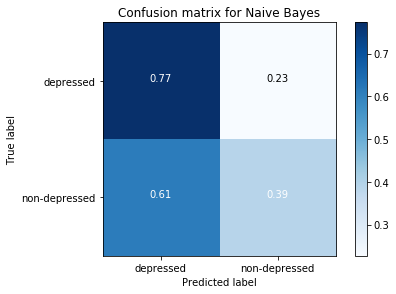

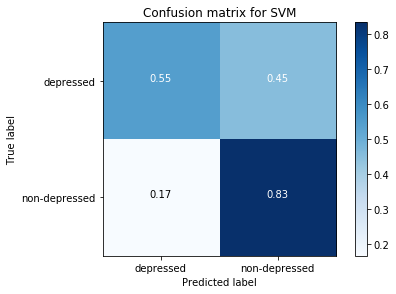

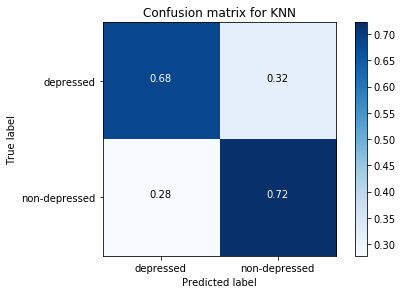

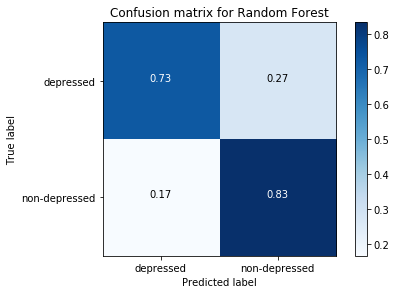

In [156]:
class_names = ['depressed', 'non-depressed']

# Plot confusion matrix for Naive Bayes
plt.figure()
plot_confusion_matrix(cm_NB, classes=class_names, normalize=True, 
                      title='Confusion matrix for Naive Bayes')

# Plot confusion matrix for SVM
plt.figure()
plot_confusion_matrix(cm_SVM, classes=class_names, normalize=True,
                      title='Confusion matrix for SVM')

# Plot confusion matrix for KNN
plt.figure()
plot_confusion_matrix(cm_KNN, classes=class_names, normalize=True,
                      title='Confusion matrix for KNN')

# Plot confusion matrix for RF
plt.figure()
plot_confusion_matrix(cm_RF, classes=class_names, normalize=True,
                      title='Confusion matrix for Random Forest')

plt.show()